## Logistic Regression from scratch

Implement Logistic Regression from scratch using NumPy and matplotlib, applied to a synthetic binary classification dataset. This project focuses on understanding core ML math—without relying on libraries like scikit-learn or TensorFlow.

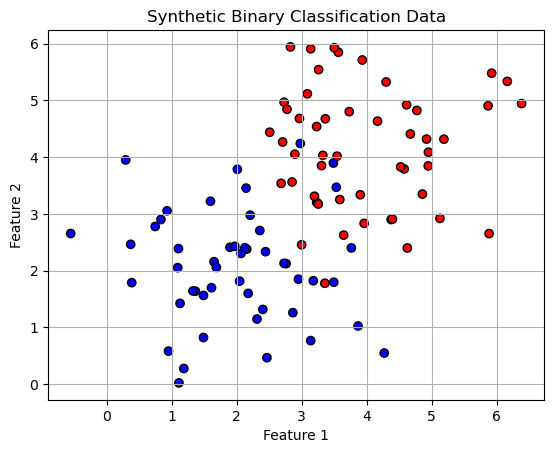

In [1]:
#Synthetic Data generation

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) #data is consistent everytime we run
X0 = np.random.randn(50, 2) + np.array([2, 2])
y0 = np.zeros(50)

X1 = np.random.randn(50, 2) + np.array([4, 4])
y1 = np.ones(50)

X = np.vstack([X0, X1])
y = np.concatenate([y0, y1])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Binary Classification Data")
plt.grid(True)
plt.show()

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

w = np.array([1.0, 1.0])          # intial weights: [w1, w2]
b = 1.0                           # initial bias

def predict(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)   

def compute_loss(y, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def compute_gradients(X, y, y_pred):
    n = X.shape[0]
    error = y_pred - y
    dw = np.dot(X.T, error) / n
    db = np.sum(error) / n
    return dw, db

In [3]:
learning_rate = 0.1
epochs = 3000
losses = []

for epoch in range(epochs):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    
    loss = compute_loss(y, y_pred)
    losses.append(loss)
    
    dw, db = compute_gradients(X, y, y_pred)
    
    # Update weights and bias
    w -= learning_rate * dw
    b -= learning_rate * db

    # Optionally print every 300 steps
    if epoch % 300 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 2.5670
Epoch 300, Loss: 0.3877
Epoch 600, Loss: 0.2993
Epoch 900, Loss: 0.2619
Epoch 1200, Loss: 0.2414
Epoch 1500, Loss: 0.2286
Epoch 1800, Loss: 0.2198
Epoch 2100, Loss: 0.2134
Epoch 2400, Loss: 0.2087
Epoch 2700, Loss: 0.2050


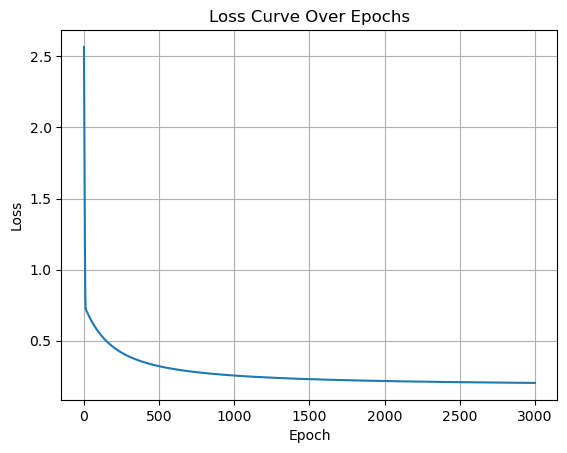

In [4]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve Over Epochs")
plt.grid(True)
plt.show()

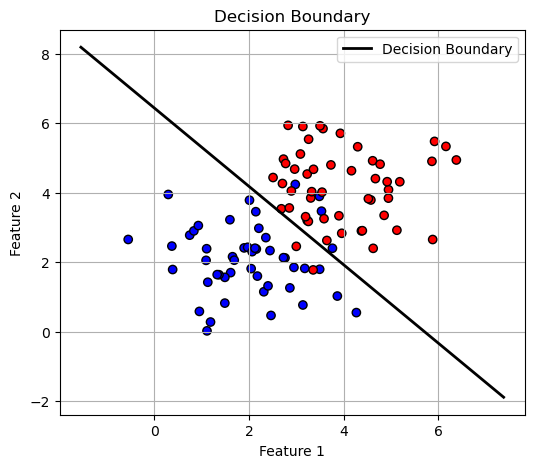

In [5]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")

x1_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
x2_vals = -(w[0] * x1_vals + b) / w[1]  # derived from model

plt.plot(x1_vals, x2_vals, color='black', linewidth=2, label="Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
pred_probs = sigmoid(np.dot(X, w) + b)
pred_labels = (pred_probs >= 0.5).astype(int)
accuracy = np.mean(pred_labels == y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [7]:
from sklearn.linear_model import LogisticRegression

# Train scikit-learn logistic regression
model = LogisticRegression()
model.fit(X, y)

# Get weights and bias
print("Sklearn Coefficients:", model.coef_)
print("Sklearn Intercept:", model.intercept_)

Sklearn Coefficients: [[1.72421183 1.48169509]]
Sklearn Intercept: [-9.8377039]


In [8]:
print("My Weights:", w)
print("My Bias:", b)

My Weights: [1.46045684 1.29361814]
My Bias: -8.333181411770333


In [9]:
from sklearn.metrics import accuracy_score

sklearn_preds = model.predict(X)
sklearn_acc = accuracy_score(y, sklearn_preds)

print(f"My Accuracy: {accuracy:.2f}")
print(f"Sklearn Accuracy: {sklearn_acc:.2f}")

My Accuracy: 0.93
Sklearn Accuracy: 0.93


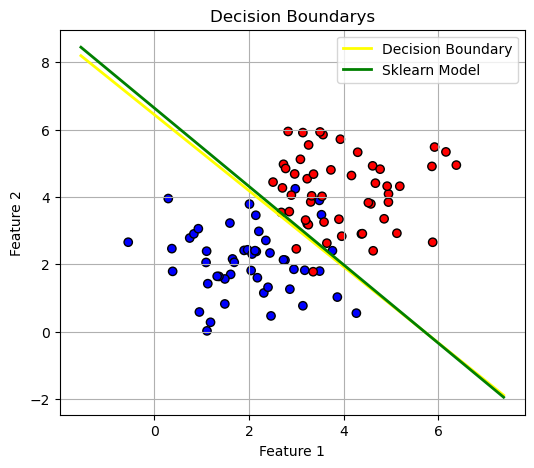

In [10]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundarys")

x1_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
x2_vals = -(w[0] * x1_vals + b) / w[1]  # derived from model
plt.plot(x1_vals, x2_vals, color='yellow', linewidth=2, label="Decision Boundary")

w1_skl = model.coef_[0][0]
w2_skl = model.coef_[0][1]
b_skl = model.intercept_[0]
x2_skvals = -(w1_skl * x1_vals + b_skl) / w2_skl
plt.plot(x1_vals, x2_skvals, color='green', linewidth=2, label="Sklearn Model")

plt.legend()
plt.grid(True)
plt.show()



### Mathematical Formulation

Given an input $ \mathbf{x} = [x_1, x_2] $, weights $ \mathbf{w} = [w_1, w_2] $, and bias $ b $, the logistic regression model predicts:

$$
z = w_1 x_1 + w_2 x_2 + b
$$

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where $ \sigma(z) $ is the **sigmoid function**, mapping any real number to a probability between 0 and 1.

---

### Loss Function: Binary Cross Entropy

To train the model, we minimize the **log loss**:

$$
\mathcal{L} = - \frac{1}{N} \sum_{i=1}^{N} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

This loss penalizes wrong predictions heavily when the model is confident but incorrect.

---

### Gradient Descent

To minimize the loss, we use **gradient descent** to update the parameters:

$$
w_j := w_j - \alpha \cdot \frac{\partial \mathcal{L}}{\partial w_j}, \quad
b := b - \alpha \cdot \frac{\partial \mathcal{L}}{\partial b}
$$

Where $ \alpha $ is the learning rate and gradients are computed from the loss.